# THYROID DETECTION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
df=pd.read_csv("thyroid.csv")
df.head()

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [5]:
#changing names of column for better understanding:
col=["age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","sick","pregnant","thyroid_surgery",
     "I131_treatment","query_hypothyroid","query_hyperthyroid","lithium","goitre","tumor","hypopituitary","psych",
     "TSH measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured",
     "TBG","target","other"]
df.columns=col
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target,other
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]


In [6]:
#Replacing ? to null values for easy identification of empty values.
df=df.replace(['?'],np.nan)
df.drop(['TSH measured','T3_measured','T4U_measured','TT4_measured','FTI_measured','TBG_measured','other'],
               axis=1,inplace=True) 
df['target'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [7]:
df['target'] = df['target'].replace({'other':0,'SVI':1,'SVHC':1,'STMW':1,'SVHD':1,'WEST':1})
df['target'].unique()

array([0, 1], dtype=int64)

In [8]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
TBG                          8822
target                          0
dtype: int64

In [9]:
#filling the null values:
df['sex'].replace({'F':1,'M':2},inplace=True)
mean_sex=round(df['sex'].mean())
df['sex'].fillna(mean_sex,inplace=True)
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
TBG                          8822
target                          0
dtype: int64

In [10]:
c=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery',
  'I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']
for i in c:
    df[i].replace({'f':1,'t':2},inplace=True)

In [11]:
knnimp=KNNImputer(n_neighbors=3) #making instance of knn with 3 neighbors.
c=['TSH','TT4','T4U','FTI','TBG','T3']
for i in c:
    df[i]=knnimp.fit_transform(df[[i]])
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
TBG                          0
target                       0
dtype: int64

In [12]:
#making data set into X & Y
y=df['target']
x=df.drop(['target'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Naive Bayes

In [13]:
def calculate_prior(y_train):
    classes=np.unique(y_train)
    priors={}
    for outcome in classes:
        priors[outcome]=np.sum(y_train==outcome)/len(y_train)
    return priors

def calculate_likelihood(x_train,y_train):
    likelihoods={}
    for feature in x_train.columns:
        likelihoods[feature]={}
        for value in np.unique(x_train[feature]):
            likelihoods[feature][value]={}
            for outcome in np.unique(y_train):
                subset=x_train[y_train==outcome]
                likelihoods[feature][value][outcome]=np.sum(subset[feature]==value)/len(subset)
    return likelihoods


def naive_bayes_predict(x_test,priors,likelihoods):
    y_pred=[]
    for i in range(len(x_test)):
        x=x_test.iloc[i]
        posteriors={}
        for outcome in priors.keys():
            prior=np.log(priors[outcome])
            log_likelihood=0  
            for feature in x_test.columns:
                feature_value=x[feature]
                if feature_value in likelihoods[feature] and outcome in likelihoods[feature][feature_value]:
                    log_likelihood+=np.log(likelihoods[feature][feature_value][outcome])
                else:
                    log_likelihood+=np.log(1e-6)  
            posteriors[outcome]=prior+log_likelihood
        y_pred.append(max(posteriors,key=posteriors.get))
    return y_pred

In [14]:
priors=calculate_prior(y_train.squeeze())
likelihoods=calculate_likelihood(x_train,y_train.squeeze())
y_pred=naive_bayes_predict(x_test,priors,likelihoods)
cm_naive=confusion_matrix(y_test,y_pred)
acc_naive=accuracy_score(y_test,y_pred)
pre_naive= precision_score(y_test,y_pred)
rec_naive=recall_score(y_test,y_pred)
f1_naive=f1_score(y_test,y_pred)
print("Naive Bayes Performance Metrics:")
print(f"Accuracy: {acc_naive:.2f}")
print(f"F1 Score: {f1_naive:.2f}")
print(f"Precision: {pre_naive:.2f}")
print(f"Recall: {rec_naive:.2f}")

C:\Users\shaik\AppData\Local\Temp\ipykernel_23012\2109057331.py:31: RuntimeWarning: divide by zero encountered in log
  log_likelihood+=np.log(likelihoods[feature][feature_value][outcome])


Naive Bayes Performance Metrics:
Accuracy: 0.72
F1 Score: 0.68
Precision: 0.64
Recall: 0.72


# KNN

In [15]:
df_normal=(df-df.min())/(df.max()-df.min())
y_knn= df_normal['target']
x_knn=df_normal.drop(['target'],axis=1)
x_train_knn,x_test_knn,y_train_knn,y_test_knn=train_test_split(x_knn,y_knn,test_size=0.3,random_state=42)

In [16]:
# KNN prediction function (Optimized)
def knn_predict(x_train,y_train,x_test,k):
    predictions=[]
    for a in x_test:
        distances=np.sqrt(np.sum((x_train-a)**2,axis=1))
        k_indices=np.argsort(distances)[:k]
        k_nearest_labels= [y_train[i] for i in k_indices]
        most_common=Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return np.array(predictions)

In [17]:
# Evaluating KNN for different k values
k_values=range(1,13)
accuracies=[] 
for k in k_values:
    y_pred_knn=knn_predict(x_train_knn.values,y_train_knn.values,x_test_knn.values,k) 
    accuracy=accuracy_score(y_test_knn,y_pred_knn) * 100 
    conf_matrix=confusion_matrix(y_test_knn,y_pred_knn)
    accuracies.append(accuracy)
    print(f"K={k}:Accuracy={accuracy:.2f}%")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

K=1:Accuracy=67.37%
Confusion Matrix:
[[1206  434]
 [ 464  648]]

K=2:Accuracy=67.37%
Confusion Matrix:
[[1206  434]
 [ 464  648]]

K=3:Accuracy=69.51%
Confusion Matrix:
[[1268  372]
 [ 467  645]]

K=4:Accuracy=69.37%
Confusion Matrix:
[[1266  374]
 [ 469  643]]

K=5:Accuracy=69.91%
Confusion Matrix:
[[1288  352]
 [ 476  636]]

K=6:Accuracy=70.28%
Confusion Matrix:
[[1295  345]
 [ 473  639]]

K=7:Accuracy=70.35%
Confusion Matrix:
[[1302  338]
 [ 478  634]]

K=8:Accuracy=70.24%
Confusion Matrix:
[[1306  334]
 [ 485  627]]

K=9:Accuracy=70.49%
Confusion Matrix:
[[1311  329]
 [ 483  629]]

K=10:Accuracy=71.04%
Confusion Matrix:
[[1318  322]
 [ 475  637]]

K=11:Accuracy=70.64%
Confusion Matrix:
[[1324  316]
 [ 492  620]]

K=12:Accuracy=70.35%
Confusion Matrix:
[[1310  330]
 [ 486  626]]



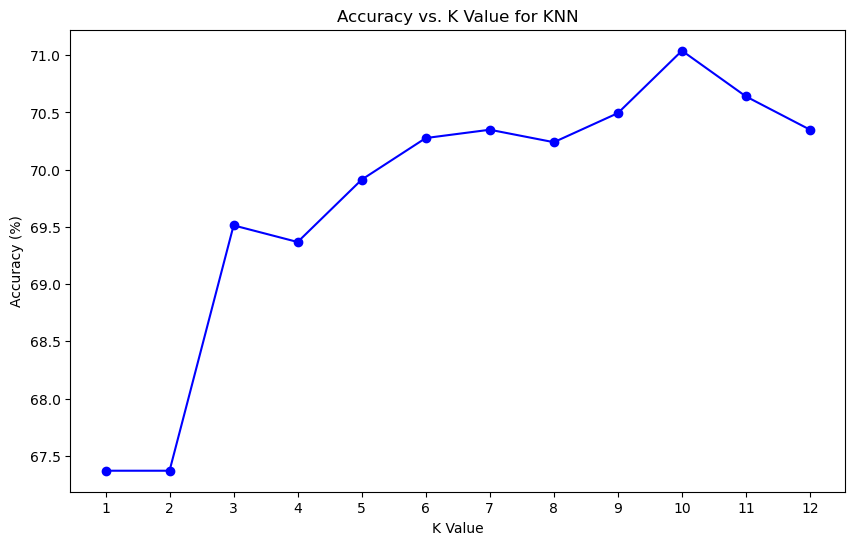

In [18]:
# Plot the graph
plt.figure(figsize=(10,6))
plt.plot(k_values,accuracies,marker='o',linestyle='-',color='b')
plt.title("Accuracy vs. K Value for KNN")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.show()

In [19]:
#KNN Performance Metrics
acc_knn=accuracy_score(y_test_knn,y_pred_knn)
f1_knn=f1_score(y_test_knn,y_pred_knn)
precision_knn=precision_score(y_test_knn,y_pred_knn)
recall_knn=recall_score(y_test_knn,y_pred_knn)
print("KNN Performance Metrics:")
print(f"Accuracy:{acc_knn:.2f}")
print(f"F1 Score:{f1_knn:.2f}")
print(f"Precision:{precision_knn:.2f}")
print(f"Recall:{recall_knn:.2f}")

KNN Performance Metrics:
Accuracy:0.70
F1 Score:0.61
Precision:0.65
Recall:0.56


# Model Comparision

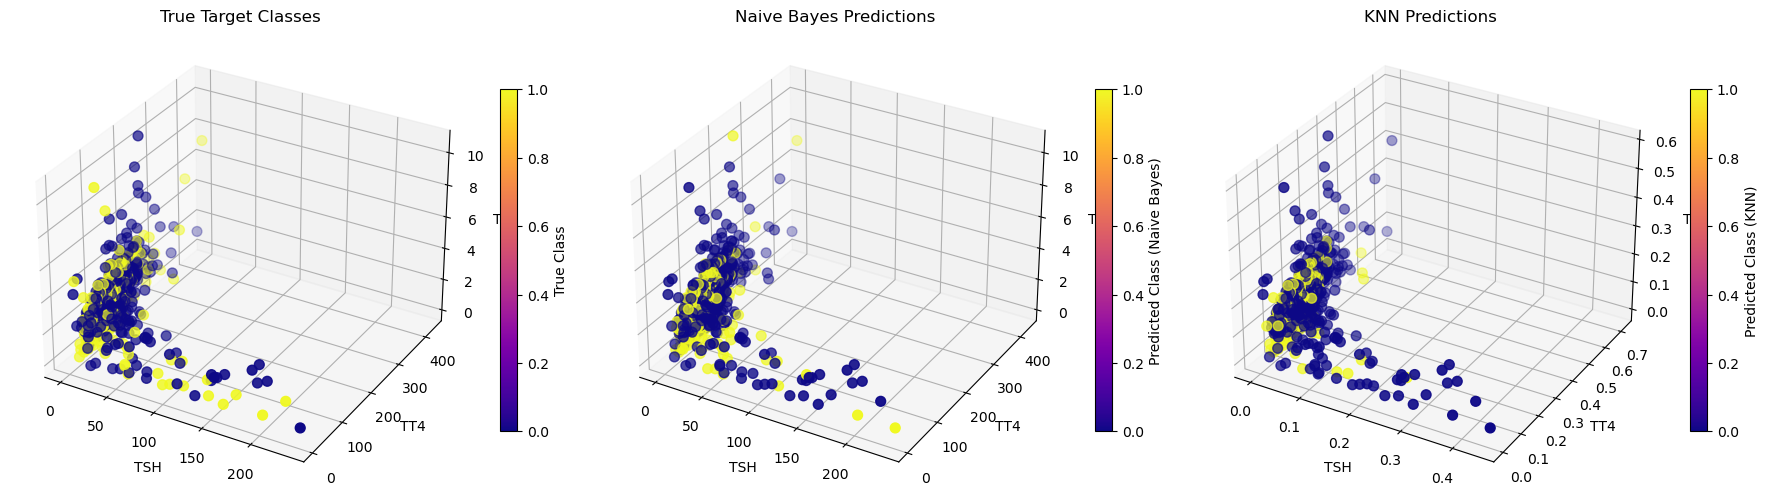

In [20]:
# Define the features and target for visualization
x_feature='TSH'
y_feature='TT4'
z_feature='T3'
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(131,projection='3d')
sc1=ax1.scatter(x_test[x_feature],x_test[y_feature],x_test[z_feature],c=y_test,s=50,cmap='plasma')
ax1.set_title("True Target Classes")
ax1.set_xlabel(x_feature)
ax1.set_ylabel(y_feature)
ax1.set_zlabel(z_feature)
cbar1=plt.colorbar(sc1,ax=ax1,shrink=0.6)
cbar1.set_label("True Class")
# Plot for Naive Bayes Predictions
ax2=fig.add_subplot(132,projection='3d')
sc2=ax2.scatter(x_test[x_feature],x_test[y_feature],x_test[z_feature],c=y_pred,s=50,cmap='plasma')
ax2.set_title("Naive Bayes Predictions")
ax2.set_xlabel(x_feature)
ax2.set_ylabel(y_feature)
ax2.set_zlabel(z_feature)
cbar2=plt.colorbar(sc2,ax=ax2,shrink=0.6)
cbar2.set_label("Predicted Class (Naive Bayes)")
# Plot for KNN Predictions
ax3=fig.add_subplot(133, projection='3d')
sc_knn=ax3.scatter(x_test_knn[x_feature],x_test_knn[y_feature],x_test_knn[z_feature],c=y_pred_knn,s=50,cmap='plasma')
ax3.set_title("KNN Predictions")
ax3.set_xlabel(x_feature)
ax3.set_ylabel(y_feature)
ax3.set_zlabel(z_feature)
cbar_knn=plt.colorbar(sc_knn,ax=ax3,shrink=0.6)
cbar_knn.set_label("Predicted Class (KNN)")
plt.tight_layout()
plt.show()

In [21]:
# Displaying the results for Naive Bayes
print("Naive Bayes Performance Metrics:")
print(f"Accuracy:{acc_naive:.2f}")
print(f"F1 Score:{f1_naive:.2f}")
print(f"Precision:{pre_naive:.2f}")
print(f"Recall:{rec_naive:.2f}")
print("\n")
# Displaying the results for KNN
print("KNN Performance Metrics:")
print(f"Accuracy:{acc_knn:.2f}")
print(f"F1 Score:{f1_knn:.2f}")
print(f"Precision:{precision_knn:.2f}")
print(f"Recall:{recall_knn:.2f}")

Naive Bayes Performance Metrics:
Accuracy:0.72
F1 Score:0.68
Precision:0.64
Recall:0.72


KNN Performance Metrics:
Accuracy:0.70
F1 Score:0.61
Precision:0.65
Recall:0.56


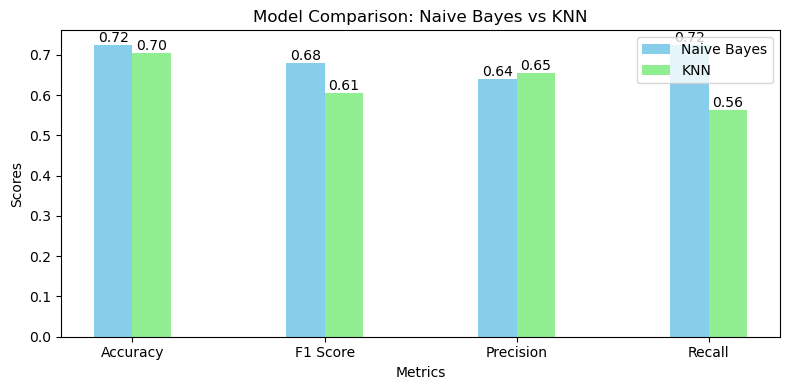

In [22]:
# Metrics for Naive Bayes and KNN
metrics=['Accuracy','F1 Score','Precision','Recall']
naive_values=[acc_naive,f1_naive,pre_naive,rec_naive]
knn_values=[acc_knn, f1_knn, precision_knn, recall_knn]
x=np.arange(len(metrics))
width=0.2
fig,ax=plt.subplots(figsize=(8,4))
bars_naive=ax.bar(x-width/2,naive_values,width,label='Naive Bayes',color='skyblue')
bars_knn=ax.bar(x+width/2,knn_values,width,label='KNN',color='lightgreen')
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Naive Bayes vs KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2,yval,f'{yval:.2f}',ha='center',va='bottom')
add_values(bars_naive)
add_values(bars_knn)
plt.tight_layout()
plt.show()